# **TASK:3** - *Language Model*

## **Data Loading**

In [8]:
# Mount and Use Data

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path
file_path = "/content/drive/My Drive/61262-0.txt"

# Load text from Google Drive
with open(file_path, "r", encoding="utf-8") as file:
    data = file.readlines()

# Print the first 20 lines of the raw text
print(data[:20])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['*** START OF THE PROJECT GUTENBERG EBOOK 61262 ***\n', '\n', '  POIROT INVESTIGATES\n', '\n', '\n', '\n', '\n', '  BY THE SAME AUTHOR\n', '\n', '  THE MYSTERIOUS AFFAIR AT STYLES\n', '\n', '  THE SECRET ADVERSARY\n', '\n', '  THE MURDER ON THE LINKS\n', '\n', '  THE BODLEY HEAD\n', '\n', '\n', '\n', '\n']


## **Data Processing**

In [9]:
# Data Processing

import string
import re
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def clean(document):

    # Ensure slicing does not exceed the document length
    #start_line = 112
    #end_line = min(7600, len(document))  # Prevents index errors

    # Only keeping the lines that correspond to the text of the book
    #document = document[start_line:end_line]

    # List of lines converted into text
    document = " ".join(document)

    # Turning the text into lowercase letters only
    document = document.lower()

    # Removing carriage return characters
    document = document.replace('\r', '')

    # Removing all other extra spaces
    document = re.sub('\s+', ' ', document)

    # Removing special characters
    document = re.sub(r'[^\x00-\x7f]', r'', document)

    # Removing the punctuation
    table = str.maketrans('', '', string.punctuation)
    document = document.translate(table)

    # Setting each "word" to be a token by splitting the text based on whitespace
    tokens = document.split()

    return tokens

tokens = clean(data)
# Printing the first 50 words of the text after cleaning
print(tokens[:50])

# Total number of words
all_words = len(tokens)
print("Total words: ", all_words)

# Unique words
unq_words = len(set(tokens))
print("Unique words: ", unq_words)

# 41 words to be used in the model,
# the first 40 words are for training and the last one for validating the prediction
length = 40 + 1
sentence_set = []

for i in range(length, len(tokens)):

    # Taking a sequence of words for each chunk of 41 words in the whole text
    sequence = tokens[i-length:i]

    # Joining the individual tokens (words) into a line (string)
    line = ' '.join(sequence)

    # Adding my sentence (line of 41 words) into my "lines" list
    sentence_set.append(line)

print(len(sentence_set))

# Previewing some of the lines
print(sentence_set[:3])

# Initializing the tokenizer object
tokenizer = Tokenizer()
# Using tokenizer to turn every unique word into a unique integer
tokenizer.fit_on_texts(sentence_set)

# Save the tokenizer
import pickle
with open('/content/drive/My Drive/tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Creating a list of integer values for all our sentences
sequences_int = tokenizer.texts_to_sequences(sentence_set)
sequences_int = np.array(sequences_int)
# Selecting the first 40 columns as my predictor variables
X = sequences_int[:, :-1]
# Selecting the last (41st) column as my response variable
y = sequences_int[:, -1]

# Turning my response variable into one-hot encoding
y = to_categorical(y, num_classes= len(tokenizer.word_index)+1)

['start', 'of', 'the', 'project', 'gutenberg', 'ebook', '61262', 'poirot', 'investigates', 'by', 'the', 'same', 'author', 'the', 'mysterious', 'affair', 'at', 'styles', 'the', 'secret', 'adversary', 'the', 'murder', 'on', 'the', 'links', 'the', 'bodley', 'head', 'poirot', 'investigates', 'by', 'agatha', 'christie', 'london', 'john', 'lane', 'the', 'bodley', 'head', 'limited', 'first', 'published', 'in', 'great', 'britain', 'by', 'john', 'lane', 'company']
Total words:  52518
Unique words:  6291
52477
['start of the project gutenberg ebook 61262 poirot investigates by the same author the mysterious affair at styles the secret adversary the murder on the links the bodley head poirot investigates by agatha christie london john lane the bodley head limited', 'of the project gutenberg ebook 61262 poirot investigates by the same author the mysterious affair at styles the secret adversary the murder on the links the bodley head poirot investigates by agatha christie london john lane the bodle

## **Training**

In [ ]:
# Model Training

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

# Define LSTM Model
model = Sequential([
    Embedding(len(tokenizer.word_index)+1, 50, input_length=X.shape[1]),
    LSTM(64, return_sequences=True),
    LSTM(128),
    Dense(128, activation='relu'),
    Dense(len(tokenizer.word_index)+1, activation='softmax')
])

model.summary()

# Compiling the model with adam optimizer and fitting it.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_history = model.fit(X, y, batch_size=128, epochs=500)

# Save the model
model.save("/content/drive/My Drive/lang-model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 99s 226ms/step - accuracy: 0.0571 - loss: 7.1101
Epoch 2/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - accuracy: 0.0612 - loss: 6.3574
Epoch 3/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 143s 233ms/step - accuracy: 0.0711 - loss: 6.1516
Epoch 4/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 94s 229ms/step - accuracy: 0.0774 - loss: 5.9923
Epoch 5/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 95s 231ms/step - accuracy: 0.0793 - loss: 5.8676
Epoch 6/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 140s 228ms/step - accuracy: 0.0860 - loss: 5.7243
Epoch 7/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 141s 226ms/step - accuracy: 0.0948 - loss: 5.6059
Epoch 8/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 95s 231ms/step - accuracy: 0.1003 - loss: 5.4783
Epoch 9/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 141s 228ms/step - accuracy: 0.1058 - loss: 5.3730
Epoch 10/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 95s 231ms/step - accuracy: 0.1123 - loss: 5.2921
Epoch 11/500
410/410 ━━━━━━━━━━━━━━━━━━━━ 143s 232ms/step - accuracy: 0.1106 - loss: 5.2179
Ep

### **Loading Model for Generation of text**

In [17]:
from keras.models import load_model
import numpy as np
import pickle

# Load the model
model = load_model('/content/drive/My Drive/lang-model.h5')

# Load the tokenizer
with open('/content/drive/My Drive/tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define the text generation function
def text_gen(model, tokenizer, seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = np.array(token_list)

        # Ensure the token list is not longer than max_sequence_len
        if len(token_list) > max_sequence_len:
            token_list = token_list[-max_sequence_len:]

        token_list = np.pad(token_list, (max_sequence_len - len(token_list), 0), 'constant')
        token_list = token_list.reshape(1, max_sequence_len)  # Reshape to (1, max_sequence_len)
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=-1)
        output_word = tokenizer.index_word[predicted_word_index[0]]
        seed_text += " " + output_word
    return seed_text

### **Comparision with GPT-2 model**

In [18]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

def gpt2_text_gen(prompt, max_length=50):
    inputs = gpt2_tokenizer.encode(prompt, return_tensors="pt")
    outputs = gpt2_model.generate(
        inputs,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        early_stopping=True,
        pad_token_id=gpt2_tokenizer.eos_token_id
    )
    return gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)

### **Displaying the generated text by both the models**

In [19]:
from IPython.display import display, Markdown

# Prediction Check
my_text = "The gentleman was"
next_words = 50
max_sequence_len = 40  # This should match the length used during training

# LSTM Model Output
lstm_output = text_gen(model, tokenizer, my_text, next_words, max_sequence_len)
display(Markdown(f"**LSTM Model Output:**\n\n```\n{lstm_output}\n```"))

# Add some space between the outputs
print("\n" + "="*80 + "\n")

# GPT-2 Model Output
gpt2_output = gpt2_text_gen(my_text, 50)
display(Markdown(f"**GPT-2 Model Output:**\n\n```\n{gpt2_output}\n```"))

**LSTM Model Output:**

```
The gentleman was handing off so what i thought he had not tear the star i comprehend that answer time i always have recent dressed for he great present of him to see and he was in grave trouble there the real states theory for the prime minister now to yardly notes of
```

**GPT-2 Model Output:**

```
The gentleman was a very good man, and I think he was very well-informed. He was quite a good friend of mine. I don't know if he knew what he did, but he had a great deal of respect for me.

```

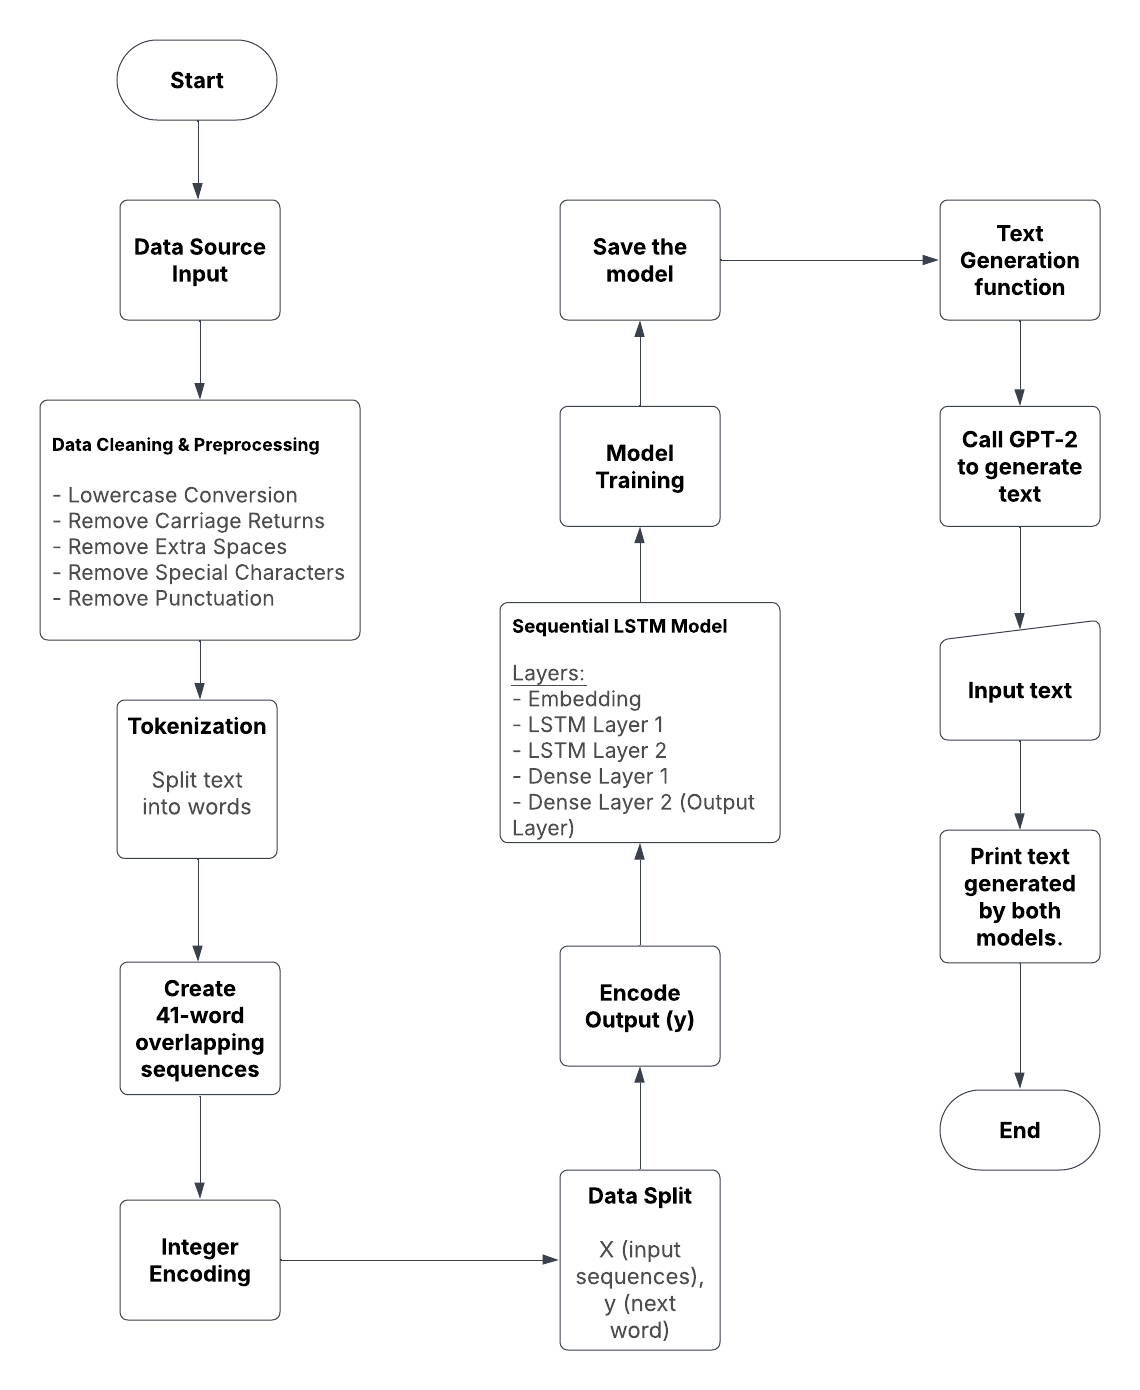

## **Report**

*  Mounted Google Drive using `drive.mount('/content/drive')` to access the text data.

*  Read the file from the specified path and printed the first 20 lines to verify the content.

*  Cleaned the text by removing unnecessary characters, converting it to lowercase, and eliminating carriage return characters, extra spaces, non-ASCII characters, and punctuation.

*  Tokenized the cleaned text into individual words.

*  Used a `Tokenizer` object to convert each unique word into a unique integer.

* Generated sequences of 41 words, with the first 40 words as input and the 41st word as the target.

* Split the sequences into predictor variables (`X`) and response variables (`y`), then converted them into one-hot encoding.

* Defined an LSTM (Long Short-Term Memory) model using the `Sequential` API from Keras.

* The model included an embedding layer, two LSTM layers, and two dense layers.

*  The embedding layer had a dimension of 50, the LSTM layers had 64 and 128 units respectively, and the dense layer had 128 units with ReLU activation.

*  The output layer used softmax activation.


*  Compiled the model with the Adam optimizer and categorical cross-entropy loss function.

*  Trained the model for 500 epochs with a batch size of 128, achieving an accuracy of 97.32% and a loss of 0.1012.

* Saved the trained model to Google Drive.

* Loaded the trained model from Google Drive.

* Defined a function `text_gen` to generate text based on a given prompt.

* The function iteratively predicted the next word and appended it to the given text.

* Compare with GPT-2 model with the generated output.





### **Different approaches you could take to solving this problem**



1. ***Core Network Architectures***


*   **Bidirectional LSTM (BiLSTM) :** Processes sequences in both forward and reverse directions simultaneously, capturing contextual relationships from past and future states. Particularly effective for mystery novel text where plot clues often appear in non-chronological patterns.


*   **Transformer with Self-Attention :** Utilizes multi-head attention mechanisms to model relationships between all words in a sequence simultaneously. Superior for capturing long-range dependencies in complex sentence structures found in detective narratives

*  **Gated Recurrent Unit (GRU) :** Implements simplified gating mechanisms compared to LSTM, potentially offering faster convergence while maintaining sequential modeling capabilities.

*   **Hybrid CNN-LSTM :** Combines convolutional layers for local phrase pattern detection with LSTM layers for temporal modeling, beneficial for identifying recurring mystery genre idioms.

*  **Neural Cache Extension :** Augments base architecture with external memory to improve rare word prediction through explicit frequency tracking of under-represented terms.

2.  ***Architectural Enhancements***

*   **Weight-Tied Embeddings :** Shares parameters between input embedding and final softmax layers, reducing model complexity while improving gradient flow

*   **Stochastic Depth :** Randomly bypasses LSTM layers during training using residual connections, acting as implicit regularization against overfitting.

*   **Multi-Scale Context Windows :** Processes parallel sequences of varying lengthslike 20/40/60 words to capture both local grammatical patterns and broader narrative context.

3.  ***Training Methodologies***

*  **Curriculum Learning :** Gradually increases sequence complexity from short grammatical constructs to full narrative passages during training.

*   **Noise-Contrastive Estimation :** Approximates full softmax computation through negative sampling, particularly beneficial given the 6,291-class output space

*   **Dynamic Batching :** Optimizes GPU utilization by grouping sequences of similar lengths while maintaining temporal integrity.


4.   ***Embedding Strategies***

*   **Subword Tokenization :** Implements Byte-Pair Encoding (BPE) to handle rare character combinations and proper nouns common in mystery novels.


*   **Pretrained Embedding Initialization :** Initializes embedding layer with GloVe or Word2Vec vectors trained on larger corpora, preserving semantic relationships absent in limited training data


*   **Character-Aware Hybrid :** Combines word-level embeddings with character CNN outputs to handle spelling variations and neologisms.









### **Provide an ordered list (expected best improvement to least improvement) of the different techniques you can use to improve the performance of a text prediction system**



*  Initializing the embedding layer with pre-trained vectors like GloVe, Word2Vec. This helps leverage knowledge from larger corpora to improve semantic representation.

*  Augmenting the model with an external "cache" to store and quickly retrieve recently seen words and their contexts. This helps in predicting rare or context-specific words.

*  Replacing the LSTM layers with a Transformer architecture based on self-attention mechanisms. Because transformers excel at capturing long-range dependencies in text.

*   Processing the input sequences in both forward and backward directions. This allows the model to consider both preceding and following context when making predictions.

*  Instead of tokenizing words, we can break the text into smaller units such as byte-pair encoding or WordPieces. This helps us handle out of vocabulary words and rare character sequences.

*  Sharing the weights between the input embedding layer and the output softmax layer. This reduces the number of parameters and can improve generalization.

*  Training the model on progressively more difficult sequences. Starting with shorter, simpler sentences and gradually increasing the length and complexity.


*  Randomly droping entire layers during training, which acts as a regularizer and can improve the model's robustness.

* Grouping sequences of similar lengths together in the same batch. Whcih might reduce padding and improves training efficiency.





### **Comparision with other LLM's**

Compared to other models, such as Transform-based models like GPT-3, the LSTM model is less complex but effective for sequential data. However, GPT-2 can handle long-range dependencies better and generate more fluent text due to its superior architecture and training on large-scale datasets.

The pros of the LSTM model include its ability to capture long-term dependencies and its suitability for sequential data. The cons include its limitations in handling long-range dependencies and generating highly fluent text compared to Transformer models.

Additionally, while the LSTM model performs well for the given task, achieving high accuracy and generating coherent text, it can be further improved by incorporating more advanced techniques and models.

 Transformer-based models like GPT-2 offer a promising alternative due to their ability to handle long-range dependencies and generate more fluent text.

 By implementing these improvements, the model's performance and the quality of the generated text can be enhanced, making it more comparable to state-of-the-art language models.

## **References**



*   Used Lucid Chart for Development of flowchart.
*   Generative AI for better English and presentation.
*  Knowledge about different models used for text generation from the internet.

